In [1]:
try:
        
    import h5py
    
    from ipywidgets import widgets, Layout, interact, interactive, interactive_output, Dropdown
    from IPython.display import display
    import matplotlib.pyplot as mplt
    import scipy
    from sympy import symbols, Eq, solve
    import numpy as np
    import random
    import seaborn as sns 
    import pandas as pd
    import graphing as gr
    #!pip install viola
    ########## Modules required for artist drawing on matplotlib
    import matplotlib.path as mpath
    import matplotlib.lines as mlines
    import matplotlib.patches as mpatches
    from matplotlib.collections import PatchCollection
    
      
except ModuleNotFoundError:
        print("A class you are trying to import is not present in the directory")
    
except Exception:
        print("Something went wrong - modules have not been imported")

else: 
    print("All relevant classes imported")

All relevant classes imported


In [47]:
#######################################################
#### GUI 

edt_filename_1 = widgets.Text(description = 'File1 (-0.85)', value=' Exp5-11')

btn_select = widgets.Button(description = 'Select files',button_style='success')
output_file = widgets.Output()

display(edt_filename_1, btn_select,output_file)



#######################################################
#### FUNCTIONS


#df_flux = pd.DataFrame({'Compartment':[],'Na_net':[], 'Na_leak':[],'Na_Atpase':[], 'K_net':[],'K_leak':[],'K_Atpase':[],'K_kcc2':[], 'Cl_net':[],'Cl_kcc2':[],'X':[],'z':[]  })
df_ed = pd.DataFrame({'Boundary':[],'Na':[],'K':[],'Cl':[]})



def btn_select_clicked(b):
    
    
    global filename_1, t_arr, v_arr 
    
    filename_1 = "\\"
    filename_1 = filename_1 + edt_filename_1.value 
    
    
    
    
    ##### FILE 1 data
    
    try: 
        with h5py.File(filename_1, mode='r') as hdf:
            
            print(filename_1+" file found... loading content") 
            global C, comp_names_arr, intervals, interval_arr, f1_v_arr,f1_ecl_arr
            C = hdf.get('COMPARTMENTS')
            C_group_arr =[]
            t_arr_bool = True
            comp_names_arr= list(C.keys())
                        
            C1 = C.get(comp_names_arr[0])
            
            T = hdf.get('TIMING')
            total_t = T.get('TOTAL_T')[()]
            intervals = T.get('INTERVALS')[()]
            dt = T.get("DT")[()]
            total_steps = total_t /dt          
            interval_step = total_steps / intervals
            interval_arr = [round(interval_step * i) for i in range(intervals)]
            

            t_arr =[]
            f1_v_arr = [] 
            f1_ecl_arr=[]
            ##### LOADING COMPARTMENT DATA
            
            for i in range(len(comp_names_arr)):
                C_group = C.get(comp_names_arr[i])
                C_group_arr.append(C_group)
                v_arr = []
                ecl_arr = []
                for j in range(len(list(C_group.keys()))):
                    dataset = C_group.get(str(interval_arr[j]))
                    v_arr.append(dataset[-3]*1e3)
                    ecl_arr.append(dataset[-1]*1e3)
                    if t_arr_bool == True:
                        t_arr.append(dataset[0]*1e3)
                f1_v_arr.append(v_arr)
                f1_ecl_arr.append(ecl_arr)
                t_arr_bool = False
                
            print(filename_1+" content loaded into memory") 
            
    except: 
        raise(filename_1+" not found")
        raise("File needs to be in base directory")
        
        

btn_select.on_click(btn_select_clicked)

Text(value=' Exp5-11', description='File1 (-0.85)')

Button(button_style='success', description='Select files', style=ButtonStyle())

Output()

\ Exp5-11 file found... loading content
\ Exp5-11 content loaded into memory


1000
90.00000000006935


Text(0.5, 1.0, 'Cl DF in each compartment')

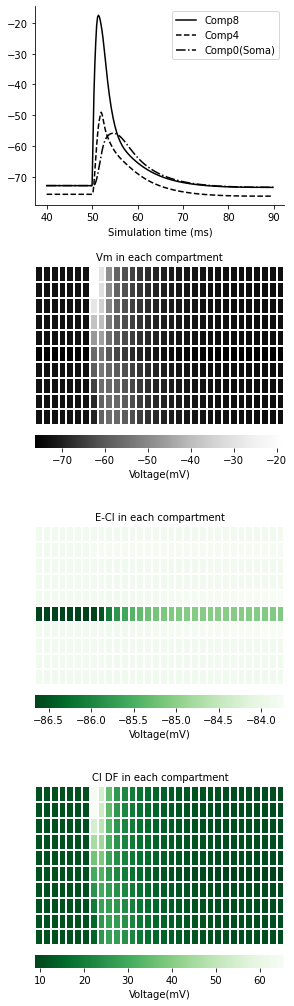

In [50]:


f5a, [ax1,ax2,ax3,ax4] = mplt.subplots(4,1,figsize=(5,15), sharey=False, sharex=False) 
sns.despine()
f5a.tight_layout(pad=4.0)
print(len(t_arr))
print(t_arr[450])

##### TOP ROW
v_arr = [f1_v_arr[8][j]for j in range(len(t_arr))]
ax1.plot(t_arr[200:450:], v_arr[200:450:],'-', label="Comp8",color='#000000')
#ax1.set_title("Biophysical model")

v_arr = [f1_v_arr[4][j] for j in range(len(t_arr))]
ax1.plot(t_arr[200:450:], v_arr[200:450:], '--',  label="Comp4",color='#000000')

v_arr = [f1_v_arr[0][j] for j in range(len(t_arr))]
ax1.plot(t_arr[200:450:], v_arr[200:450:], '-.', label="Comp0(Soma)",color='#000000')
ax1.legend()

#ax1.get_xaxis().set_visible(False)
#ax1.set_ylabel("Membrane Potential (mV)")
ax1.set_xlabel("Simulation time (ms)")
#ax1.set_ylim([-75,-52.5])
#ax1.set_yticks([-70,-65,-60,-55])


vm_arr = []
ecl_arr = []
df_cl_arr = []
for i in range(len(f1_v_arr),0,-1):
        
    temp_arr_vm = [f1_v_arr[i-1][j] for j in range(len(f1_v_arr[0]))] 
    temp_arr_vm = temp_arr_vm[200:450:8]
    vm_arr.append(temp_arr_vm)
    
    temp_arr_ecl = [f1_ecl_arr[i-1][j] for j in range(len(f1_ecl_arr[0]))] 
    temp_arr_ecl = temp_arr_ecl[200:450:8]
    ecl_arr.append(temp_arr_ecl)

    temp_arr_df_cl = [f1_v_arr[i-1][j] - f1_ecl_arr[i-1][j] for j in range(len(f1_ecl_arr[0]))] 
    temp_arr_df_cl = temp_arr_df_cl[200:450:8]
    df_cl_arr.append(temp_arr_df_cl)
    
g_vm = sns.heatmap(vm_arr,cmap="Greys_r",xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' }, ax=ax2,linewidth=0.01 )
#g_vm.set_ylabel("Compartment",fontsize=10)
#g_vm.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
ax2.set_title("Vm in each compartment",fontsize=10)  

g_ecl = sns.heatmap(ecl_arr,cmap="Greens_r",xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' }, ax=ax3,linewidth=0.01 )
#g_vm.set_ylabel("Compartment",fontsize=10)
#g_ecl.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
ax3.set_title("E-Cl in each compartment",fontsize=10)

g_df_cl = sns.heatmap(df_cl_arr,cmap="Greens_r",xticklabels=False, yticklabels=False, cbar_kws={'pad':0.05,'label':'Voltage(mV)', 'orientation':'horizontal' }, ax=ax4,linewidth=0.01 )
#g_vm.set_ylabel("Compartment",fontsize=10)
#g_df_cl.set_yticklabels(comp_names_arr[::-1], fontsize=8, rotation=0)
ax4.set_title("Cl DF in each compartment",fontsize=10)

